# CSV파일 다루기

In [1]:
import pandas as pd

titanic_csv_filepath = "train.csv"
titanic_df = pd.read_csv(titanic_csv_filepath)

In [2]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# dataframe의 간략한 정보를 볼 때는 info()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
alive = titanic_df[titanic_df["Survived"] == 1]
dead  = titanic_df[titanic_df["Survived"] == 0]

# 생존율 계산
len(alive)/len(titanic_df)

0.3838383838383838

## 생존자와 사망자 구하기

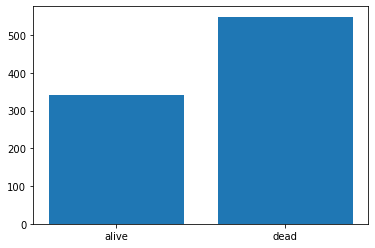

In [5]:
import matplotlib.pyplot as plt

plt.bar(["alive", "dead"], height=[len(alive), len(dead)])
plt.show()

## 가설 - 요금별 생존자와 사망자 비교하기. 비싼 요금을 낸 사람일수록 생존확률이 높을까?

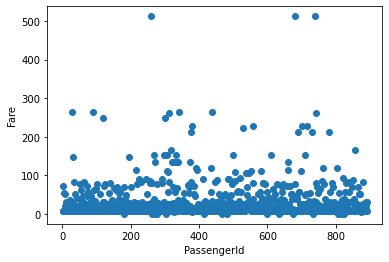

In [6]:
# 먼저 탑승자별 요금 분포도 파악
plt.scatter(titanic_df["PassengerId"], titanic_df["Fare"])
plt.xlabel("PassengerId")
plt.ylabel("Fare")
plt.show()

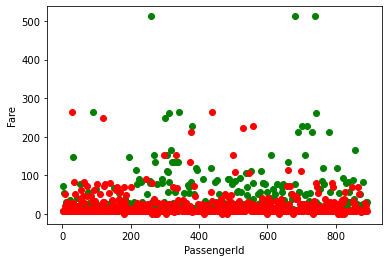

In [7]:
# 생존자(초록색), 사망자(빨간색)
# 위에서 alive, dead를 구해놓았음
plt.scatter(alive["PassengerId"], alive["Fare"], color="GREEN")
plt.scatter(dead["PassengerId"], dead["Fare"], color="RED")
plt.xlabel("PassengerId")
plt.ylabel("Fare")
plt.show()

## 요금별 생존자, 사망자를 표로 보기

In [8]:
over_50 = titanic_df[titanic_df["Fare"] >= 50]
under_50 = titanic_df[titanic_df["Fare"] < 50]

len(over_50) / len(titanic_df) * 100

18.069584736251404

In [9]:
len(under_50) / len(titanic_df) * 100

81.9304152637486

In [13]:
# $50 이상 요금낸 사람 중 생존다
alive_over_50 = over_50[over_50["Survived"] == 1]
alive_under_50 = under_50[under_50["Survived"] == 1]

In [12]:
len(alive_over_50) / len(over_50)

0.6770186335403726

In [11]:
len(alive_under_50) / len(under_50)

0.31917808219178084